In [1]:
# Importing necessary packages
import pandas as pd # python's data handling package
import numpy as np # python's scientific computing package
import matplotlib.pyplot as plt # python's plotting package
from sklearn.metrics import mean_squared_error as mse

##### Loading data.

In [2]:
# Both features and target have already been scaled: mean = 0; SD = 1
data = pd.read_csv('Houseprice_data_scaled.csv') 

In [3]:
# First 1800 data items are training set; the next 600 are the validation set
train = data.iloc[:1800] 
val = data.iloc[1800:2400]
test = data.iloc[2400:]

In [4]:
# Creating the "X" and "y" variables. We drop sale price from "X"
X_train, X_val, X_test = train.drop('Sale Price', axis=1), val.drop('Sale Price', axis=1), test.drop('Sale Price', axis=1)
y_train, y_val, y_test = train[['Sale Price']], val[['Sale Price']], test[['Sale Price']]

###### Linear Regression

In [5]:
# Importing models
from sklearn.linear_model import LinearRegression

In [6]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [7]:
# Create dataFrame with corresponding feature and its respective coefficients
lr_coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lr.intercept_) + list(lr.coef_[0])
    ]
).transpose().set_index(0)
lr_coeffs

,1
0,
intercept,-67.803171
LotArea,0.07895
OverallQual,0.214535
OverallCond,0.096406
YearBuilt,0.160694
YearRemodAdd,0.025279
BsmtFinSF1,0.091253
BsmtUnfSF,-0.033319
TotalBsmtSF,0.138197


###### Ridge Regression

In [8]:
# Importing Ridge
from sklearn.linear_model import Ridge

In [9]:
# we will create a regression function so that we do not have to repeat this code later on
def regress(alphas, X_train, y_train, X_val, y_val, X_test, y_test, mses, test_results, kind):
    """ Return None. Runs the ridge regression given a list of alphas, X_train, y_train, y_val
        and appends the resulting MSE for each alpha into a list mses.
        
        Parameters:
            alphas (list): List of alphas to run the ridge regression on 
            X_train (DataFrame): X training set
            y_train (DataFrame): y training set 
            X_val (DataFrame): x validation set 
            y_val (DataFrame): y validation set 
            X_test (DataFrame): x test set 
            y_test (DataFrame): y test set
            mses (list): empty list to store the resulting mses
            test_results (list): empty list to store the results of the test data
            kind (str): string describing whether to run a ridge or lasso regression 
    """
    if kind == 'ridge':
        for alpha in alphas:
            ridge=Ridge(alpha=alpha)
            ridge.fit(X_train,y_train)
            pred=ridge.predict(X_val)
            mses.append(mse(y_val,pred))
            
            test_pred=ridge.predict(X_test)
            test_results.append(mse(y_test, test_pred))
            
    elif kind == 'lasso':
        for alpha in alphas:
            lasso=Lasso(alpha=alpha)
            lasso.fit(X_train,y_train)
            pred=lasso.predict(X_val)
            mses.append(mse(y_val,pred))
            
            test_pred=lasso.predict(X_test)
            test_results.append(mse(y_test, test_pred))

In [10]:
# The alpha used by Python's ridge should be the lambda in Hull's book times the number of observations
alphas=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
mses=[]
r_results = []

# create a dataframe to visualize the results
ridge_mses_table = pd.DataFrame({'Alphas': alphas})

# use regress function with ridge to append mses to the mses list 
regress(alphas, X_train, y_train, X_val, y_val, X_test, y_test, mses, r_results, 'ridge')
    
# add the results to the mses dataframe 
ridge_mses_table['Original Ridge Training MSE'] = mses
ridge_mses_table['Original Ridge Validation MSE'] = r_results
ridge_mses_table

,Alphas,Original Ridge Training MSE,Original Ridge Validation MSE
0,18.0,0.117033,0.118188
1,36.0,0.117108,0.118412
2,54.0,0.117240,0.118679
3,72.0,0.117415,0.118979
4,90.0,0.117624,0.119302
5,135.0,0.118257,0.120178
6,180.0,0.119001,0.121111
7,360.0,0.122546,0.125009
8,720.0,0.130736,0.132729


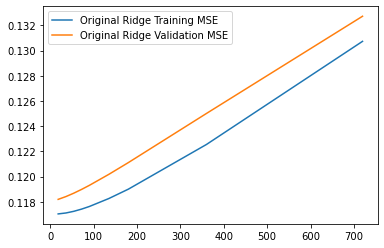

In [11]:
plt.plot(alphas, mses, label='Original Ridge Training MSE')
plt.plot(alphas, r_results, label='Original Ridge Validation MSE')
plt.legend()

###### Lasso

In [12]:
# Import Lasso
from sklearn.linear_model import Lasso

In [13]:
# Here we produce results for alpha=0.05 which corresponds to lambda=0.1 in Hull's book
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)

Lasso(alpha=0.05)

In [14]:
# DataFrame with corresponding feature and its respective coefficients
lasso_coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)
lasso_coeffs

,1
0,
intercept,-0.0
LotArea,0.044304
OverallQual,0.298079
OverallCond,0.0
YearBuilt,0.052091
YearRemodAdd,0.064471
BsmtFinSF1,0.115875
BsmtUnfSF,-0.0
TotalBsmtSF,0.10312


###### Lasso with different levels of alpha and its mse

In [15]:
# We now consider different lambda values. The alphas are half the lambdas
alphas=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses=[]
l_results = []

# create a dataframe to visualize the results
lasso_mses_table = pd.DataFrame({'Alphas': alphas})

# use the regress function with lasso to append mses to list
regress(alphas, X_train, y_train, X_val, y_val, X_test, y_test, mses, l_results, 'lasso')
    
lasso_mses_table['Original Lasso Training MSE'] = mses
lasso_mses_table['Original Lasso Validation MSE'] = l_results
lasso_mses_table

,Alphas,Original Lasso Training MSE,Original Lasso Validation MSE
0,0.0050,0.116548,0.118786
1,0.0100,0.116827,0.119990
2,0.0150,0.118033,0.122372
3,0.0200,0.120128,0.125420
4,0.0250,0.123015,0.128881
5,0.0375,0.131786,0.138769
6,0.0500,0.140172,0.147205


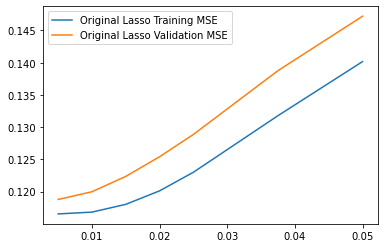

In [16]:
plt.plot(alphas, mses, label='Original Lasso Training MSE')
plt.plot(alphas, l_results, label='Original Lasso Validation MSE')
plt.legend()

## Cleaning the Data
We will start by cleaning the original data and scaled data 

In [17]:
# store original dataframe in variable original_data
original_data = pd.read_csv('Original_data.csv')

In [18]:
# get the column values from the scaled data set and the original data set 
data_labels = data.columns.values
original_labels = original_data.columns.values
print(data_labels, '\n')
print(original_labels)

['LotArea' 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd'
 'BsmtFinSF1' 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'GrLivArea'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'TotRmsAbvGrd' 'Fireplaces'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 'Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'Names' 'NoRidge'
 'NPkVill' 'NriddgHt' 'NWAmes' 'OLDTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker' 'Bsmt Qual' 'Sale Price'] 

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2

#### Delete whitespace in labels

In [19]:
# we noticed that there are some white spaces in some of the labels of the scaled data
# we will clean the labels by deleting white spaces in data_labels

new_labels = {}
for label in data_labels:
    no_spaces_label = label.replace(' ', '')
    # if there is a difference between the original label and the cleaned label then we replace the original 
    # with the clean label 
    if label != no_spaces_label:
        # replace the data label from the list of data labels 
        data_labels = np.where(data_labels==label, no_spaces_label, data_labels)
        # add new labels to the dictionary of new labels
        new_labels[label] = no_spaces_label  

# create a new dataframe of the scaled data with the new labels 
new_data = data.rename(columns=new_labels)

# store the cleaned labels in a variable called new_data_labels
new_data_labels = new_data.columns.values
print(new_data_labels)

# we will use the new_data, with the cleaned labels, as our scaled dataframe 
# (originally called 'data', now with cleaned labels, but same values)
new_data

['LotArea' 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd'
 'BsmtFinSF1' 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'GrLivArea'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'TotRmsAbvGrd' 'Fireplaces'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 'Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'Names' 'NoRidge'
 'NPkVill' 'NriddgHt' 'NWAmes' 'OLDTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker' 'BsmtQual' 'SalePrice']


,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,OLDTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,BsmtQual,SalePrice
0,-0.199572,0.652747,-0.512407,1.038851,0.875754,0.597837,-0.937245,-0.482464,-0.808820,1.203988,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.358489
1,-0.072005,-0.072527,2.189741,0.136810,-0.432225,1.218528,-0.635042,0.490326,0.276358,-0.789421,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,10.905682,0.584308,0.008849
2,0.111026,0.652747,-0.512407,0.972033,0.827310,0.095808,-0.296754,-0.329118,-0.637758,1.231999,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.552733
3,-0.077551,0.652747,-0.512407,-1.901135,-0.722887,-0.520319,-0.057698,-0.722067,-0.528171,0.975236,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,-0.528560
4,0.444919,1.378022,-0.512407,0.938624,0.730423,0.481458,-0.170461,0.209990,-0.036366,1.668495,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.895898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,-0.922157,-1.523077,1.289025,-0.063644,-0.722887,-1.013221,-0.044167,-1.225235,-1.637405,0.485054,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,-1.169567
2904,-0.926816,-1.523077,-0.512407,-0.063644,-0.722887,-0.438169,-0.612489,-1.225235,-1.637405,0.485054,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,-1.422084
2905,1.081646,-0.797802,1.289025,-0.397733,0.536648,1.779888,-1.275533,0.399276,0.174790,-0.789421,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,-0.645107
2906,0.021285,-0.797802,-0.512407,0.671352,0.342874,-0.244203,0.021236,-0.348286,-0.504115,-0.789421,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,-0.632157


##### Search and Fill Categorical NaN Values

In [20]:
# if we look at some columns, there are missing values in the categorial data, labelled as NaN, for instance, in:
original_data['Fence']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
2903      NaN
2904      NaN
2905      NaN
2906    MnPrv
2907      NaN
Name: Fence, Length: 2908, dtype: object

In [21]:
# there are also numerical values of 0, which are not equal to NaN values, for instance:
original_data['PoolArea']

0       0
1       0
2       0
3       0
4       0
       ..
2903    0
2904    0
2905    0
2906    0
2907    0
Name: PoolArea, Length: 2908, dtype: int64

In [22]:
# we will replace all categorical values that are labeled as NaN, with the string 'Missing'
for label in original_labels:
    c = pd.Categorical(original_data[label])
    if c.categories.dtype == object:
        original_data[label].fillna('Missing', inplace=True)

In [23]:
# for example, the results for the feature 'Fence' now show the string "Missing", instead of NaN
# Now "Missing" will have it's own category 
original_data['Fence']

0       Missing
1       Missing
2       Missing
3       Missing
4       Missing
         ...   
2903    Missing
2904    Missing
2905    Missing
2906      MnPrv
2907    Missing
Name: Fence, Length: 2908, dtype: object

#### Create and Assign Dummy Variables to Categorical Data 

In [24]:
# now we want to see if we can replace the categorical data with dummy variables
# if we were given a seperate dataframe with the ranked values of each category, we could 
# assign the dummy variables based on that rank
# since we only have a definitions document, we would have to do this manually for all the categorical 
# columns in the original data file
# instead, the following shows how to assign dummy variables to all the categorical features randomly, 
# if ranking did not matter:

In [25]:
# create a copy of the original cleaned data
new_var_data = original_data.copy()
var_labels = new_var_data.columns.values

# create a dictionary to store the definitions of all the 
# dummy variable values for each feature
explain_dummies = {}

# iterate through the columns in original data using the labels
for label in var_labels:
    
    # create a variable to store the column as a categorical variable
    c = pd.Categorical(new_var_data[label])
    
    # check if the dtype of the category is an object
    if c.categories.dtype == object:
        
        # create dummy variables
        dummies = list(range(len(c.categories) + 1))
        dummies.remove(0)
        
        # create a dictionary for replacements
        replacements = {}
        
        # assign each category a dummy variable 
        for i in range(len(c.categories)):
            replacements[c.categories[i]] = dummies[i]
        
        # add the dictionary of replacements to the explainatory dictionary
        explain_dummies[label] = replacements
        
        # replace categorical values with dummy variables
        new_var_data[label].replace(replacements, inplace=True)

In [26]:
# print out the dictionary explaining all the dummy variables 
for key in explain_dummies:
    print(key,':', explain_dummies[key], '\n')

MSZoning : {'C (all)': 1, 'FV': 2, 'Missing': 3, 'RH': 4, 'RL': 5, 'RM': 6} 

Street : {'Grvl': 1, 'Pave': 2} 

Alley : {'Grvl': 1, 'Missing': 2, 'Pave': 3} 

LotShape : {'IR1': 1, 'IR2': 2, 'IR3': 3, 'Reg': 4} 

LandContour : {'Bnk': 1, 'HLS': 2, 'Low': 3, 'Lvl': 4} 

Utilities : {'AllPub': 1, 'Missing': 2, 'NoSeWa': 3} 

LotConfig : {'Corner': 1, 'CulDSac': 2, 'FR2': 3, 'FR3': 4, 'Inside': 5} 

LandSlope : {'Gtl': 1, 'Mod': 2, 'Sev': 3} 

Neighborhood : {'Blmngtn': 1, 'Blueste': 2, 'BrDale': 3, 'BrkSide': 4, 'ClearCr': 5, 'CollgCr': 6, 'Crawfor': 7, 'Edwards': 8, 'Gilbert': 9, 'IDOTRR': 10, 'MeadowV': 11, 'Mitchel': 12, 'NAmes': 13, 'NPkVill': 14, 'NWAmes': 15, 'NoRidge': 16, 'NridgHt': 17, 'OldTown': 18, 'SWISU': 19, 'Sawyer': 20, 'SawyerW': 21, 'Somerst': 22, 'StoneBr': 23, 'Timber': 24, 'Veenker': 25} 

Condition1 : {'Artery': 1, 'Feedr': 2, 'Norm': 3, 'PosA': 4, 'PosN': 5, 'RRAe': 6, 'RRAn': 7, 'RRNe': 8, 'RRNn': 9} 

Condition2 : {'Artery': 1, 'Feedr': 2, 'Norm': 3, 'PosA': 4, '

In [27]:
# we can now get the dictionary for a specific feature, for instance
print('Kitchen Quality dummies:', explain_dummies['KitchenQual'])
print('\nKitchen Quality\n', new_var_data['KitchenQual'])

Kitchen Quality dummies: {'Ex': 1, 'Fa': 2, 'Gd': 3, 'Missing': 4, 'TA': 5}

Kitchen Quality
 0       3
1       5
2       3
3       3
4       3
       ..
2903    5
2904    5
2905    5
2906    5
2907    5
Name: KitchenQual, Length: 2908, dtype: int64


In [28]:
# show the cleaned data, after replacing all NaN and 0 values, and changing the categorial values into 
# dummy variables
new_var_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Unnamed: 81,Unnamed: 82
0,1,60,5,65.0,8450,2,2,4,4,1,...,3,2,0,2,2008,10,5,208500,NaN,2
1,2,20,5,80.0,9600,2,2,4,4,1,...,3,2,0,5,2007,10,5,181500,NaN,2
2,3,60,5,68.0,11250,2,2,1,4,1,...,3,2,0,9,2008,10,5,223500,NaN,2
3,4,70,5,60.0,9550,2,2,1,4,1,...,3,2,0,2,2006,10,1,140000,NaN,2
4,5,60,5,84.0,14260,2,2,1,4,1,...,3,2,0,12,2008,10,5,250000,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,2915,160,6,21.0,1936,2,2,4,4,1,...,3,2,0,6,2006,10,5,90500,NaN,2
2904,2916,160,6,21.0,1894,2,2,4,4,1,...,3,2,0,4,2006,10,1,71000,NaN,2
2905,2917,20,5,160.0,20000,2,2,4,4,1,...,3,2,0,9,2006,10,1,131000,NaN,2
2906,2918,85,5,62.0,10441,2,2,4,4,1,...,4,4,700,7,2006,10,5,132000,NaN,2


#### Fixing Dummy Variables

In [29]:
# Lets look at the labels for Kitchen
print('Kitchen dummies:', explain_dummies['KitchenQual'])

Kitchen dummies: {'Ex': 1, 'Fa': 2, 'Gd': 3, 'Missing': 4, 'TA': 5}


In [30]:
# according to the documentation, the definition of the kitchen labels should be as follows:
# Ex --> Excellent
# Gd --> Good
# TA --> typical/ Average
# Fa --> Fair
# Po --> Poor
# Missing --> NaN

# we will reassign dummy variables so that: 
# {'Ex': 5, 'Fa': 2, 'Gd': 4, 'Missing': 1, 'TA': 3}

# in other words, we will change (from --> to):
# 1 --> 5
# 3 --> 4
# 4 --> 1
# 5 --> 3

# we will create a new variable to store the kitchen values with the new assigned dummies
new_var_data['KitchenQual'] = new_var_data['KitchenQual'].replace([1, 3, 4, 5], [5, 4, 1, 3])

# show the new values
new_var_data['KitchenQual']

0       4
1       3
2       4
3       4
4       4
       ..
2903    3
2904    3
2905    3
2906    3
2907    3
Name: KitchenQual, Length: 2908, dtype: int64

In [31]:
# we will do the same for LotShape
print('LotShape dummies:', explain_dummies['LotShape'])

LotShape dummies: {'IR1': 1, 'IR2': 2, 'IR3': 3, 'Reg': 4}


In [32]:
# according to the documentation, the definition of the LotShape labels should be as follows:
# Reg --> Regular
# IR1 --> Slightly Irregular
# IR2 --> Moderately Irredular
# IR3 --> Irregular

# we will reassign dummy variables so that the most irregular shape will be assigned the 
# highest valued dummy variable, and regular will be assigned 0
# {'IR1': 2, 'IR2': 3, 'IR3': 4, 'Reg': 1}

# in other words, we will change (from --> to):
# 1 --> 2
# 2 --> 3
# 3 --> 4
# 4 --> 1

# we will create a new variable to store the kitchen values with the new assigned dummies
new_var_data['LotShape'] = new_var_data['LotShape'].replace([1, 2, 3, 4], [2, 3, 4, 1])

# show the new values
new_var_data['LotShape']

0       1
1       1
2       2
3       2
4       2
       ..
2903    1
2904    1
2905    1
2906    1
2907    1
Name: LotShape, Length: 2908, dtype: int64

#### Filling in numerical values of 0

In [33]:
# now we will split the new_var_data, into training, validation and testing sets before we begin filling in 
# the numerical values 
original_train = new_var_data.iloc[:1800] 
original_val = new_var_data.iloc[1800:2400]
original_test = new_var_data.iloc[2400:]

In [34]:
# for our first method, we will try replacing all the zero values found in the training set with the mean of 
# the non-zero values in the column
# later on, we would replace the 0 values in the validation and testing set with the mean from the training set

# first create a copy of the original data, and store as null_equal_mean
null_equals_mean = original_train.copy()
NEM_labels = null_equals_mean.columns.values

for label in NEM_labels:
    c = pd.Categorical(null_equals_mean[label])
    
    # if the column contains numerical values
    if c.categories.dtype == 'int64':
        
        # count the number of non-zero values in the column 
        count = np.count_nonzero(null_equals_mean[label])
        
        # get the total of the values in the column 
        total = null_equals_mean[label].sum()
        
        # divide the total by the number of non-zero values to get the mean 
        mean = total // count
        
        # replace all zero values with the mean value
        null_equals_mean[label] = null_equals_mean[label].replace(0, mean)

In [35]:
# show the new results of the numerical columns, for instance:
null_equals_mean['PoolArea']

0       598
1       598
2       598
3       598
4       598
       ... 
1795    598
1796    598
1797    598
1798    598
1799    598
Name: PoolArea, Length: 1800, dtype: int64

In [36]:
null_equals_mean['LowQualFinSF']

0       358
1       358
2       358
3       358
4       358
       ... 
1795    358
1796    358
1797    431
1798    358
1799    358
Name: LowQualFinSF, Length: 1800, dtype: int64

In [37]:
# we will manually replace the missing values for LotFrontage since its values are float64
# instead of int64
_mean_without_zero = null_equals_mean['LotFrontage'].replace(0,np.nan).mean()
print('LotFrontage Mean Without Zeros:', _mean_without_zero)
null_equals_mean['LotFrontage']= null_equals_mean['LotFrontage'].replace(0,np.nan).fillna(_mean_without_zero)

LotFrontage Mean Without Zeros: 69.42914707857622


In [38]:
# Check to see if there are any null values in LotFrontage
count = null_equals_mean['LotFrontage'].isnull().sum()
print(count)

0


In [39]:
# now we will import IterativeImputer to try filling the missing numerical 
# values with a regressed value
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

In [40]:
# first make a copy of the original_train where categorical values are changed to dummy variables
# since the imputer does not work on categorical data 
regressed_train = original_train.copy()
regressed_labels = regressed_train.columns.values

In [41]:
regressed_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Unnamed: 81,Unnamed: 82
0,1,60,5,65.0,8450,2,2,1,4,1,...,3,2,0,2,2008,10,5,208500,NaN,2
1,2,20,5,80.0,9600,2,2,1,4,1,...,3,2,0,5,2007,10,5,181500,NaN,2
2,3,60,5,68.0,11250,2,2,2,4,1,...,3,2,0,9,2008,10,5,223500,NaN,2
3,4,70,5,60.0,9550,2,2,2,4,1,...,3,2,0,2,2006,10,1,140000,NaN,2
4,5,60,5,84.0,14260,2,2,2,4,1,...,3,2,0,12,2008,10,5,250000,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1800,80,5,80.0,8000,2,2,1,4,1,...,2,2,0,7,2009,10,5,138000,NaN,2
1796,1801,50,5,60.0,10800,2,2,1,4,1,...,3,2,0,8,2009,10,5,133500,NaN,2
1797,1802,50,5,60.0,8064,2,2,1,4,1,...,3,2,0,8,2009,1,1,135000,NaN,2
1798,1803,60,5,76.0,7570,2,2,1,4,1,...,3,2,0,3,2009,10,5,144750,NaN,2


In [42]:
# create a linear regression, and declare a limear imputer 
lr = LinearRegression()
linearimputer = IterativeImputer(estimator = lr)

In [43]:
regressed_train = regressed_train.replace(0, np.nan)

In [44]:
linearimputer.fit(regressed_train)

IterativeImputer(estimator=LinearRegression())

In [45]:
regressed_train = linearimputer.transform(regressed_train)

In [46]:
regressed_train = pd.DataFrame(regressed_train)
regressed_train

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,1.0,60.0,5.0,65.0,8450.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,2715.284998,2.0,2008.0,10.0,5.0,208500.0,2.0
1,2.0,20.0,5.0,80.0,9600.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,1406.111396,5.0,2007.0,10.0,5.0,181500.0,2.0
2,3.0,60.0,5.0,68.0,11250.0,2.0,2.0,2.0,4.0,1.0,...,4.0,3.0,2.0,2288.712747,9.0,2008.0,10.0,5.0,223500.0,2.0
3,4.0,70.0,5.0,60.0,9550.0,2.0,2.0,2.0,4.0,1.0,...,4.0,3.0,2.0,3540.425223,2.0,2006.0,10.0,1.0,140000.0,2.0
4,5.0,60.0,5.0,84.0,14260.0,2.0,2.0,2.0,4.0,1.0,...,4.0,3.0,2.0,1741.365339,12.0,2008.0,10.0,5.0,250000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1800.0,80.0,5.0,80.0,8000.0,2.0,2.0,1.0,4.0,1.0,...,4.0,2.0,2.0,1374.328245,7.0,2009.0,10.0,5.0,138000.0,2.0
1796,1801.0,50.0,5.0,60.0,10800.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,2385.094153,8.0,2009.0,10.0,5.0,133500.0,2.0
1797,1802.0,50.0,5.0,60.0,8064.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,577.272223,8.0,2009.0,1.0,1.0,135000.0,2.0
1798,1803.0,60.0,5.0,76.0,7570.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,543.399820,3.0,2009.0,10.0,5.0,144750.0,2.0


#### Apply the Training Set Linear Regression to the Validation and Testing Sets

In [47]:
# we will now use the linear regression model created from the original data set to fill in the 0 values found
# in the validation and testing 

In [48]:
# create copies of the data
regressed_val = original_val.copy()
regressed_test = original_test.copy()

In [49]:
# replace 0 values with NaN
regressed_val = regressed_val.replace(0, np.nan)
regressed_test = regressed_test.replace(0, np.nan)

In [50]:
# transform the values using the imputer model created from the training set 
regressed_val = linearimputer.transform(regressed_val)
regressed_test = linearimputer.transform(regressed_test)

In [51]:
# create a dataframe for the validation and testing sets
regressed_val = pd.DataFrame(regressed_val)
regressed_test = pd.DataFrame(regressed_test)

# check results
regressed_val

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,1805.0,20.0,5.0,80.0000,7936.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,707.460557,4.0,2009.0,10.0,5.0,127000.0,2.0
1,1806.0,50.0,6.0,68.0000,4080.0,2.0,1.0,1.0,4.0,1.0,...,4.0,3.0,2.0,2244.929805,6.0,2009.0,10.0,5.0,128900.0,2.0
2,1807.0,90.0,6.0,57.0000,10307.0,2.0,1.0,1.0,4.0,1.0,...,4.0,3.0,2.0,6766.065958,6.0,2009.0,10.0,5.0,103500.0,2.0
3,1808.0,50.0,6.0,90.0000,15660.0,2.0,2.0,1.0,4.0,1.0,...,4.0,4.0,2.0,1891.640901,7.0,2009.0,10.0,5.0,130000.0,2.0
4,1809.0,70.0,6.0,90.0000,9900.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,1043.145641,3.0,2009.0,10.0,5.0,129000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2403.0,90.0,5.0,63.0000,8668.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,1726.416647,5.0,2007.0,10.0,5.0,126000.0,2.0
596,2404.0,85.0,5.0,80.0324,10050.0,2.0,2.0,2.0,4.0,1.0,...,4.0,3.0,2.0,2452.003866,6.0,2007.0,10.0,5.0,175000.0,2.0
597,2405.0,80.0,5.0,100.0000,9600.0,2.0,2.0,2.0,4.0,1.0,...,4.0,3.0,2.0,2928.721508,5.0,2007.0,10.0,5.0,158500.0,2.0
598,2406.0,20.0,5.0,73.0000,8760.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,1180.721476,9.0,2007.0,10.0,5.0,141000.0,2.0


In [52]:
# create a dictionary for the labels we want for our columns 
labels = regressed_labels.tolist()
labels.remove('Unnamed: 81')
features = {}
column = 0
for label in labels:
    features[column] = label
    column += 1

# concat the training, validation and test sets into one dataframe
frames = [regressed_train, regressed_val, regressed_test]
regressed_data = pd.concat(frames)
regressed_data.reset_index(drop=True, inplace=True)

# rename the columnes with our dictionary of features
regressed_data = regressed_data.rename(columns=features)

# show the dataframe with our regressed values and correct labels 
regressed_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Unnamed: 82
0,1.0,60.0,5.0,65.0,8450.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,2715.284998,2.0,2008.0,10.0,5.0,208500.0,2.0
1,2.0,20.0,5.0,80.0,9600.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,1406.111396,5.0,2007.0,10.0,5.0,181500.0,2.0
2,3.0,60.0,5.0,68.0,11250.0,2.0,2.0,2.0,4.0,1.0,...,4.0,3.0,2.0,2288.712747,9.0,2008.0,10.0,5.0,223500.0,2.0
3,4.0,70.0,5.0,60.0,9550.0,2.0,2.0,2.0,4.0,1.0,...,4.0,3.0,2.0,3540.425223,2.0,2006.0,10.0,1.0,140000.0,2.0
4,5.0,60.0,5.0,84.0,14260.0,2.0,2.0,2.0,4.0,1.0,...,4.0,3.0,2.0,1741.365339,12.0,2008.0,10.0,5.0,250000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,2915.0,160.0,6.0,21.0,1936.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,2457.041432,6.0,2006.0,10.0,5.0,90500.0,2.0
2904,2916.0,160.0,6.0,21.0,1894.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,2833.636212,4.0,2006.0,10.0,1.0,71000.0,2.0
2905,2917.0,20.0,5.0,160.0,20000.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,3610.109078,9.0,2006.0,10.0,1.0,131000.0,2.0
2906,2918.0,85.0,5.0,62.0,10441.0,2.0,2.0,1.0,4.0,1.0,...,4.0,4.0,4.0,700.000000,7.0,2006.0,10.0,5.0,132000.0,2.0


#### Normalize the Data 

In [53]:
# we will create a quick function to normalize the given values, which will be used later
def normalize(raw_data):
    """ Returns the dataframe after normalizing its values. Prints the first five results
        after standardizing the values. 
        
        Parameters:
            raw_data(DataFrame): a dataframe
            
        Returns:
            X (Dataframe): data with normalized values 
    """
    X = raw_data
    X = (X - X.mean()) / X.std()
    return X

In [54]:
# now lets look at the three other features we want to include in our analysis
# we want to create a dataframe with normalized values for each feature and append it to our scaled data
# we will break this step into three seperate for loops to show our work 

# first place the label names of the four new features in a list 
new_features = ['LotFrontage', 'LotShape','LowQualFinSF', 'KitchenQual']

# for each feature we want to create a new series, convert it into a dataframe, 
# then store into a dictionary in the following format:
# dataframes_lst['LabelName'] = df['LabelName']
dataframes_lst = {}

for feature in new_features:
    # store the series of each new label into the dictionary, with the key being the feature label, and the value
    # being the series for that feature
    dataframes_lst[feature] = regressed_data[feature]
    
    # check the series
    print(feature)
    print(dataframes_lst[feature], '\n')

LotFrontage
0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
        ...  
2903     21.0
2904     21.0
2905    160.0
2906     62.0
2907     74.0
Name: LotFrontage, Length: 2908, dtype: float64 

LotShape
0       1.0
1       1.0
2       2.0
3       2.0
4       2.0
       ... 
2903    1.0
2904    1.0
2905    1.0
2906    1.0
2907    1.0
Name: LotShape, Length: 2908, dtype: float64 

LowQualFinSF
0       482.824328
1       364.757295
2       466.387837
3       429.155951
4       480.864811
           ...    
2903    348.039818
2904    355.631911
2905    396.693210
2906    325.222771
2907    457.889153
Name: LowQualFinSF, Length: 2908, dtype: float64 

KitchenQual
0       4.0
1       3.0
2       4.0
3       4.0
4       4.0
       ... 
2903    3.0
2904    3.0
2905    3.0
2906    3.0
2907    3.0
Name: KitchenQual, Length: 2908, dtype: float64 



In [55]:
# normalize the values for each feature and convert to dataframes

for feature in dataframes_lst:
    # use the normalize function created before to normalize the data 
    dataframes_lst[feature] = normalize(dataframes_lst[feature])
    
    # show the normalized data 
    print('Normalized data for: ', feature)
    print(dataframes_lst[feature], '\n')
    
    # convert each series into a dataframe
    dataframes_lst[feature] = pd.DataFrame({feature: dataframes_lst[feature]})
    
    # show the new dataframe
    print(dataframes_lst[feature], '\n')

Normalized data for:  LotFrontage
0      -0.227031
1       0.459195
2      -0.089786
3      -0.455773
4       0.642189
          ...   
2903   -2.239961
2904   -2.239961
2905    4.119067
2906   -0.364276
2907    0.184705
Name: LotFrontage, Length: 2908, dtype: float64 

      LotFrontage
0       -0.227031
1        0.459195
2       -0.089786
3       -0.455773
4        0.642189
...           ...
2903    -2.239961
2904    -2.239961
2905     4.119067
2906    -0.364276
2907     0.184705

[2908 rows x 1 columns] 

Normalized data for:  LotShape
0      -0.701232
1      -0.701232
2       1.058201
3       1.058201
4       1.058201
          ...   
2903   -0.701232
2904   -0.701232
2905   -0.701232
2906   -0.701232
2907   -0.701232
Name: LotShape, Length: 2908, dtype: float64 

      LotShape
0    -0.701232
1    -0.701232
2     1.058201
3     1.058201
4     1.058201
...        ...
2903 -0.701232
2904 -0.701232
2905 -0.701232
2906 -0.701232
2907 -0.701232

[2908 rows x 1 columns] 

Normalized dat

In [56]:
# create a copy of the given scaled dataframe so we don't need to make changes to the original
# reminder that we stored the given scaled data in a variable called new_data after fixing the column labels 
new_scaled = new_data.copy()

# add the new features to the dataframe
for feature in dataframes_lst:
    new_scaled[feature] = dataframes_lst[feature]
    
# show new dataframe with the added feature 
new_scaled

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Somerst,StoneBr,Timber,Veenker,BsmtQual,SalePrice,LotFrontage,LotShape,LowQualFinSF,KitchenQual
0,-0.199572,0.652747,-0.512407,1.038851,0.875754,0.597837,-0.937245,-0.482464,-0.808820,1.203988,...,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.358489,-0.227031,-0.701232,1.217644,0.745365
1,-0.072005,-0.072527,2.189741,0.136810,-0.432225,1.218528,-0.635042,0.490326,0.276358,-0.789421,...,-0.268378,-0.127929,-0.152629,10.905682,0.584308,0.008849,0.459195,-0.701232,-0.061260,-0.768267
2,0.111026,0.652747,-0.512407,0.972033,0.827310,0.095808,-0.296754,-0.329118,-0.637758,1.231999,...,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.552733,-0.089786,1.058201,1.039604,0.745365
3,-0.077551,0.652747,-0.512407,-1.901135,-0.722887,-0.520319,-0.057698,-0.722067,-0.528171,0.975236,...,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,-0.528560,-0.455773,1.058201,0.636307,0.745365
4,0.444919,1.378022,-0.512407,0.938624,0.730423,0.481458,-0.170461,0.209990,-0.036366,1.668495,...,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.895898,0.642189,1.058201,1.196419,0.745365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,-0.922157,-1.523077,1.289025,-0.063644,-0.722887,-1.013221,-0.044167,-1.225235,-1.637405,0.485054,...,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,-1.169567,-2.239961,-0.701232,-0.242344,-0.768267
2904,-0.926816,-1.523077,-0.512407,-0.063644,-0.722887,-0.438169,-0.612489,-1.225235,-1.637405,0.485054,...,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,-1.422084,-2.239961,-0.701232,-0.160106,-0.768267
2905,1.081646,-0.797802,1.289025,-0.397733,0.536648,1.779888,-1.275533,0.399276,0.174790,-0.789421,...,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,-0.645107,4.119067,-0.701232,0.284670,-0.768267
2906,0.021285,-0.797802,-0.512407,0.671352,0.342874,-0.244203,0.021236,-0.348286,-0.504115,-0.789421,...,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,-0.632157,-0.364276,-0.701232,-0.489499,-0.768267


#### Finding Correlation between Features 

In [57]:
# find the correlation between the new feature and the old features
correlation = new_scaled.corr()

# show the correlation between the new feature and the old features, sorting by correlation value
for feature in dataframes_lst:
    series = correlation[feature].sort_values(ascending=False)
    df = pd.DataFrame({feature: series})
    print(df, '\n\n')

               LotFrontage
LotFrontage       1.000000
LotArea           0.467768
1stFlrSF          0.442650
SalePrice         0.362517
GrLivArea         0.358591
GarageArea        0.347562
TotRmsAbvGrd      0.344086
TotalBsmtSF       0.312142
GarageCars        0.308510
Fireplaces        0.267116
BedroomAbvGr      0.260548
LotShape          0.193488
OverallQual       0.185246
FullBath          0.180258
LowQualFinSF      0.178451
BsmtFinSF1        0.167999
NriddgHt          0.155115
KitchenQual       0.144791
OpenPorchSF       0.140850
NoRidge           0.134428
WoodDeckSF        0.124131
NWAmes            0.116563
ClearCr           0.108754
Names             0.108048
BsmtUnfSF         0.105156
YearBuilt         0.096421
Timber            0.096075
BsmtQual          0.090365
YearRemodAdd      0.058524
Mitchel           0.058317
Gilbert           0.044086
Sawyer            0.039324
HalfBath          0.034470
EnclosedPorch     0.030210
Crawfor           0.027199
Veenker           0.025330
2

In [58]:
# we can also find the correlation of just the four features and the target
new_features.append('SalePrice')
ft_cor = new_scaled[new_features].corr()
ft_cor

,LotFrontage,LotShape,LowQualFinSF,KitchenQual,SalePrice
LotFrontage,1.000000,0.193488,0.178451,0.144791,0.362517
LotShape,0.193488,1.000000,0.066384,0.181144,0.295283
LowQualFinSF,0.178451,0.066384,1.000000,0.213640,0.166605
KitchenQual,0.144791,0.181144,0.213640,1.000000,0.676551
SalePrice,0.362517,0.295283,0.166605,0.676551,1.000000


In [59]:
# we could repeat the steps we did for the selected features with all the features that contain 
# numerical values, to see if there are lower correlations 
# (we would not choose the categorical data since the dummy variables are randomized)

# create copies of the scaled and original data
dt_cpy = new_data.copy()
dt_labels = dt_cpy.columns.values
og_cpy = original_data.copy()

# drop the features in the scaled data from the original data so that we have the features unique to the
# original data 
for label in dt_labels:
    try:
        og_cpy = og_cpy.drop([label], axis=1)
    except:
        pass

labels = og_cpy.columns.values
# find numerical features only, normalize values, create a dataframe, and add it to the scaled data
for label in labels:
    c = pd.Categorical(og_cpy[label])
    if c.categories.dtype == 'int64':
        og_cpy[label] = normalize(og_cpy[label])
        df = pd.DataFrame({label: og_cpy[label]})
        try:
            left, right = left.align(right, axis=1, copy=False)
            exists = (dt_cpy[label] != df)
        except:
            dt_cpy[label] = df

# add Lot Shape and Lot Frontage 
dt_cpy['LotShape'] = dataframes_lst['LotShape']
dt_cpy['LotFrontage'] = dataframes_lst['LotFrontage']

# create correlation matrix, look at the results in LotShape and LotFrontage
cor = dt_cpy.corr()
cor

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,LowQualFinSF,KitchenAbvGr,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotShape,LotFrontage
LotArea,1.000000,0.086673,-0.033150,0.017576,0.015758,0.159231,0.019874,0.221602,0.305884,0.023698,...,0.001164,-0.019865,0.016852,0.056576,0.062359,0.038451,0.006081,-0.022765,0.279651,0.467768
OverallQual,0.086673,1.000000,-0.094930,0.597037,0.570760,0.263189,0.275955,0.545862,0.469155,0.239868,...,-0.047362,-0.160402,0.019314,0.041634,-0.003839,-0.027473,0.030629,-0.017737,0.247357,0.185246
OverallCond,-0.033150,-0.094930,1.000000,-0.372161,0.046786,-0.049329,-0.138436,-0.179788,-0.160490,0.006709,...,0.012364,-0.087415,0.043696,0.046217,-0.011095,0.046992,-0.004293,0.029123,-0.084864,-0.055122
YearBuilt,0.017576,0.597037,-0.372161,1.000000,0.611591,0.278964,0.130222,0.415522,0.310830,0.015281,...,-0.142928,-0.137856,0.016055,-0.041440,-0.011080,-0.028011,0.014027,-0.012253,0.274541,0.096421
YearRemodAdd,0.015758,0.570760,0.046786,0.611591,1.000000,0.146063,0.164871,0.299617,0.240549,0.157115,...,-0.059137,-0.142677,0.037571,-0.047315,-0.023055,-0.018338,0.017758,0.033886,0.205150,0.058524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MiscVal,0.038451,-0.027473,0.046992,-0.028011,-0.018338,0.017168,-0.027344,-0.011851,-0.011282,0.003655,...,-0.005885,0.032588,0.000290,0.012109,0.017880,1.000000,-0.008423,0.017457,0.040109,0.016560
MoSold,0.006081,0.030629,-0.004293,0.014027,0.017758,0.004506,0.021066,0.022730,0.042946,0.015801,...,0.010566,0.035317,0.027336,0.029822,-0.037605,-0.008423,1.000000,-0.153829,0.001454,0.019270
YrSold,-0.022765,-0.017737,0.029123,-0.012253,0.033886,0.026226,-0.037634,-0.008702,-0.009424,-0.017139,...,-0.001876,0.034935,0.022443,-0.006905,-0.053902,0.017457,-0.153829,1.000000,-0.036155,-0.005631
LotShape,0.279651,0.247357,-0.084864,0.274541,0.205150,0.149073,0.017539,0.191793,0.182876,0.078634,...,-0.022807,-0.092433,0.020544,0.053088,-0.000036,0.040109,0.001454,-0.036155,1.000000,0.193488


# Regressions
Now we will start looking at the different kinds of regressions

In [60]:
# First 1800 data items are training set; the next 600 are the validation set
new_train = new_scaled.iloc[:1800] 
new_val = new_scaled.iloc[1800:2400]
new_test = new_scaled.iloc[2400:]

In [61]:
# Creating the "X" and "y" variables. We drop sale price from "X"
nX_train, nX_val, nX_test = new_train.drop('SalePrice', axis=1), new_val.drop('SalePrice', axis=1), new_test.drop('SalePrice', axis=1)
ny_train, ny_val, ny_test = new_train[['SalePrice']], new_val[['SalePrice']], new_test[['SalePrice']]

In [62]:
# Linear Regression 
new_lr=LinearRegression()
new_lr.fit(nX_train,ny_train)

LinearRegression()

In [63]:
# Create dataFrame with corresponding feature and its respective coefficients
new_coeffs = pd.DataFrame(
    [
        ['intercept'] + list(nX_train.columns),
        list(new_lr.intercept_) + list(new_lr.coef_[0])
    ]
).transpose().set_index(0)

new_coeffs

,1
0,
intercept,0.002646
LotArea,0.043183
OverallQual,0.193108
OverallCond,0.086903
YearBuilt,0.163274
YearRemodAdd,0.014829
BsmtFinSF1,0.073645
BsmtUnfSF,-0.034792
TotalBsmtSF,0.134365


In [64]:
# show the original linear regression without the four added features for comparison
lr_coeffs

,1
0,
intercept,-67.803171
LotArea,0.07895
OverallQual,0.214535
OverallCond,0.096406
YearBuilt,0.160694
YearRemodAdd,0.025279
BsmtFinSF1,0.091253
BsmtUnfSF,-0.033319
TotalBsmtSF,0.138197


#### Ridge Regression with Four New Features

In [65]:
# Ridge Regression
# The alpha used by Python's ridge should be the lambda in Hull's book times the number of observations
alphas=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
new_r_mses=[]
test_r_mses=[]
  
# use regress with ridge to append new mses
regress(alphas, nX_train, ny_train, nX_val, ny_val, nX_test, ny_test, new_r_mses, test_r_mses, 'ridge')

ridge_mses_table['New Ridge Training MSE'] = new_r_mses
ridge_mses_table['New Ridge Validation MSE'] = test_r_mses
ridge_mses_table

,Alphas,Original Ridge Training MSE,Original Ridge Validation MSE,New Ridge Training MSE,New Ridge Validation MSE
0,18.0,0.117033,0.118188,0.109110,0.115776
1,36.0,0.117108,0.118412,0.109411,0.115410
2,54.0,0.117240,0.118679,0.109726,0.115225
3,72.0,0.117415,0.118979,0.110049,0.115160
4,90.0,0.117624,0.119302,0.110379,0.115178
5,135.0,0.118257,0.120178,0.111221,0.115457
6,180.0,0.119001,0.121111,0.112082,0.115934
7,360.0,0.122546,0.125009,0.115651,0.118597
8,720.0,0.130736,0.132729,0.123175,0.124777


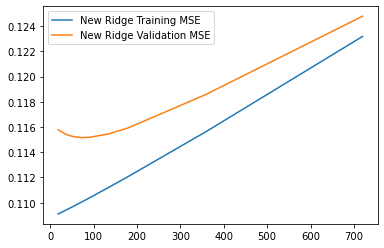

In [66]:
plt.plot(alphas, new_r_mses, label='New Ridge Training MSE')
plt.plot(alphas, test_r_mses, label='New Ridge Validation MSE')
plt.legend()
plt.show()

#### Lasso Regression with Four New Faetures 

In [67]:
# Lasso Regression
lasso = Lasso(alpha=0.05)
lasso.fit(nX_train, ny_train)

Lasso(alpha=0.05)

In [68]:
# DataFrame with corresponding feature and its respective coefficients
nl_coeffs = pd.DataFrame(
    [
        ['intercept'] + list(nX_train.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)
nl_coeffs

,1
0,
intercept,-0.001159
LotArea,0.04084
OverallQual,0.264567
OverallCond,0.0
YearBuilt,0.046394
YearRemodAdd,0.028091
BsmtFinSF1,0.113352
BsmtUnfSF,-0.0
TotalBsmtSF,0.098285


In [69]:
# Show the original coefficients generated from the first lasso regression without the added four features 
lasso_coeffs

,1
0,
intercept,-0.0
LotArea,0.044304
OverallQual,0.298079
OverallCond,0.0
YearBuilt,0.052091
YearRemodAdd,0.064471
BsmtFinSF1,0.115875
BsmtUnfSF,-0.0
TotalBsmtSF,0.10312


In [70]:
# We now consider different lambda values. The alphas are half the lambdas
alphas=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
new_l_mses=[]
new_l_test_mses=[]

# use regress with lasso to append new mse to the results 
regress(alphas, nX_train, ny_train, nX_val, ny_val, nX_test, ny_test, new_l_mses, new_l_test_mses, 'lasso')

lasso_mses_table['New Lasso Training MSE'] = new_l_mses
lasso_mses_table['New Lasso Validation MSE'] = new_l_test_mses
lasso_mses_table

# the original lasso is the original lasso regression without the four added features
# the New lasso MSE is the lasso regression with the four added features
# results from using the test set are labelled with Test MSE

,Alphas,Original Lasso Training MSE,Original Lasso Validation MSE,New Lasso Training MSE,New Lasso Validation MSE
0,0.0050,0.116548,0.118786,0.109627,0.113757
1,0.0100,0.116827,0.119990,0.111468,0.113159
2,0.0150,0.118033,0.122372,0.113345,0.114602
3,0.0200,0.120128,0.125420,0.115954,0.116856
4,0.0250,0.123015,0.128881,0.119451,0.120036
5,0.0375,0.131786,0.138769,0.128482,0.128913
6,0.0500,0.140172,0.147205,0.136729,0.136549


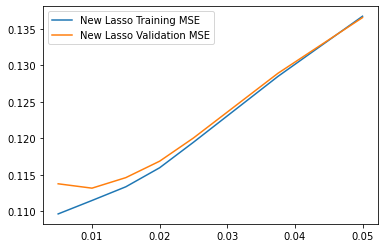

In [71]:
plt.plot(alphas, new_l_mses, label='New Lasso Training MSE')
plt.plot(alphas, new_l_test_mses, label='New Lasso Validation MSE')
plt.legend()

#### Run the Regressions Again With a Random Sample 

In [72]:
# now we will randomize the training and validation sets by shuffling the rows
new_var_data = new_var_data.sample(frac=1)
new_var_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Unnamed: 81,Unnamed: 82
1936,1941,60,5,73.0,11184,2,2,2,4,1,...,3,2,0,4,2008,10,4,183000,NaN,2
1395,1400,50,5,51.0,6171,2,2,1,4,1,...,4,2,0,10,2009,10,5,137450,NaN,2
599,601,60,5,74.0,10927,2,2,1,4,1,...,3,2,0,6,2006,10,5,275000,NaN,2
1470,1475,120,5,24.0,2280,2,2,1,4,1,...,3,2,0,6,2010,10,5,120000,NaN,2
683,685,60,5,58.0,16770,2,2,3,4,1,...,3,2,0,6,2010,10,5,221000,NaN,2


In [73]:
# after reshuffling, we will reset the index so that when we splice the data set it will keep the randomization 
new_var_data.reset_index(drop=True, inplace=True)
new_var_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Unnamed: 81,Unnamed: 82
0,1941,60,5,73.0,11184,2,2,2,4,1,...,3,2,0,4,2008,10,4,183000,NaN,2
1,1400,50,5,51.0,6171,2,2,1,4,1,...,4,2,0,10,2009,10,5,137450,NaN,2
2,601,60,5,74.0,10927,2,2,1,4,1,...,3,2,0,6,2006,10,5,275000,NaN,2
3,1475,120,5,24.0,2280,2,2,1,4,1,...,3,2,0,6,2010,10,5,120000,NaN,2
4,685,60,5,58.0,16770,2,2,3,4,1,...,3,2,0,6,2010,10,5,221000,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,876,60,2,75.0,9000,2,2,1,4,1,...,3,2,0,8,2007,8,6,303477,NaN,2
2904,388,80,5,72.0,7200,2,2,1,4,1,...,2,2,0,10,2009,10,1,125000,NaN,2
2905,2673,120,5,NaN,2938,2,2,1,4,1,...,3,2,0,5,2006,10,5,246990,NaN,2
2906,2024,60,5,NaN,9205,2,2,2,4,1,...,3,2,0,6,2008,10,5,290000,NaN,2


In [74]:
# split into the training and validation sets
rand_train = new_var_data.iloc[:1800] 
rand_val = new_var_data.iloc[1800:2400]
rand_test = new_var_data.iloc[2400:]

#### We are going to reimputate the values since we have to reshuffle the data 

In [75]:
# first make a copy of the original_train where categorical values are changed to dummy variables
# since the imputer does not work on categorical data 
regressed_train = rand_train.copy()
regressed_labels = regressed_train.columns.values

In [76]:
regressed_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Unnamed: 81,Unnamed: 82
0,1941,60,5,73.0,11184,2,2,2,4,1,...,3,2,0,4,2008,10,4,183000,NaN,2
1,1400,50,5,51.0,6171,2,2,1,4,1,...,4,2,0,10,2009,10,5,137450,NaN,2
2,601,60,5,74.0,10927,2,2,1,4,1,...,3,2,0,6,2006,10,5,275000,NaN,2
3,1475,120,5,24.0,2280,2,2,1,4,1,...,3,2,0,6,2010,10,5,120000,NaN,2
4,685,60,5,58.0,16770,2,2,3,4,1,...,3,2,0,6,2010,10,5,221000,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2625,160,5,68.0,13108,2,2,2,4,1,...,3,2,0,12,2006,10,5,270000,NaN,2
1796,1632,120,5,57.0,8013,2,2,2,4,1,...,3,2,0,9,2009,10,5,239500,NaN,2
1797,1001,20,5,74.0,10206,2,2,1,4,1,...,3,2,0,7,2009,10,5,82000,NaN,2
1798,2801,30,6,60.0,7200,2,2,1,4,1,...,3,2,0,3,2006,5,4,90000,NaN,2


In [77]:
# create a linear regression, and declare a limear imputer 
lr = LinearRegression()
linearimputer = IterativeImputer(estimator = lr)

In [78]:
regressed_train = regressed_train.replace(0, np.nan)

In [79]:
linearimputer.fit(regressed_train)

IterativeImputer(estimator=LinearRegression())

In [80]:
regressed_train = linearimputer.transform(regressed_train)

In [81]:
regressed_train = pd.DataFrame(regressed_train)
regressed_train

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,1941.0,60.0,5.0,73.000000,11184.0,2.0,2.0,2.0,4.0,1.0,...,4.0,3.0,2.0,1944.304035,4.0,2008.0,10.0,4.0,183000.0,2.0
1,1400.0,50.0,5.0,51.000000,6171.0,2.0,2.0,1.0,4.0,1.0,...,4.0,4.0,2.0,1015.330580,10.0,2009.0,10.0,5.0,137450.0,2.0
2,601.0,60.0,5.0,74.000000,10927.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,501.754215,6.0,2006.0,10.0,5.0,275000.0,2.0
3,1475.0,120.0,5.0,24.000000,2280.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,-1144.681850,6.0,2010.0,10.0,5.0,120000.0,2.0
4,685.0,60.0,5.0,58.000000,16770.0,2.0,2.0,3.0,4.0,1.0,...,4.0,3.0,2.0,3256.671122,6.0,2010.0,10.0,5.0,221000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2625.0,160.0,5.0,68.000000,13108.0,2.0,2.0,2.0,4.0,1.0,...,4.0,3.0,2.0,2198.506457,12.0,2006.0,10.0,5.0,270000.0,2.0
1796,1632.0,120.0,5.0,57.000000,8013.0,2.0,2.0,2.0,4.0,1.0,...,4.0,3.0,2.0,1391.186457,9.0,2009.0,10.0,5.0,239500.0,2.0
1797,1001.0,20.0,5.0,74.000000,10206.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,4563.167069,7.0,2009.0,10.0,5.0,82000.0,2.0
1798,2801.0,30.0,6.0,60.000000,7200.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,1646.405532,3.0,2006.0,5.0,4.0,90000.0,2.0


#### Apply the Training Set Linear Regression to the Validation and Testing Sets

In [82]:
# we will now use the linear regression model created from the original data set to fill in the 0 values found
# in the validation and testing 

In [83]:
# create copies of the data
regressed_val = rand_val.copy()
regressed_test = rand_test.copy()

In [84]:
# replace 0 values with NaN
regressed_val = regressed_val.replace(0, np.nan)
regressed_test = regressed_test.replace(0, np.nan)

In [85]:
# transform the values using the imputer model created from the training set 
regressed_val = linearimputer.transform(regressed_val)
regressed_test = linearimputer.transform(regressed_test)

In [86]:
# create a dataframe for the validation and testing sets
regressed_val = pd.DataFrame(regressed_val)
regressed_test = pd.DataFrame(regressed_test)

# check results
regressed_val

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,637.0,30.0,6.0,51.000000,6120.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,3400.925494,1.0,2009.0,6.0,5.0,60000.0,2.0
1,1486.0,60.0,5.0,63.000000,8577.0,2.0,2.0,2.0,4.0,1.0,...,4.0,3.0,2.0,1245.087706,4.0,2010.0,10.0,5.0,185088.0,2.0
2,168.0,60.0,5.0,86.000000,10562.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,2485.364542,11.0,2007.0,8.0,6.0,325624.0,2.0
3,1099.0,50.0,6.0,50.000000,6000.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,2747.651378,7.0,2009.0,10.0,5.0,128000.0,2.0
4,23.0,20.0,5.0,75.000000,9742.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,2578.022586,9.0,2008.0,10.0,5.0,230000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,369.0,20.0,5.0,78.000000,7800.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,2278.334158,3.0,2010.0,10.0,5.0,132000.0,2.0
596,2846.0,60.0,5.0,66.878108,9930.0,2.0,2.0,2.0,4.0,1.0,...,4.0,3.0,2.0,1357.810962,7.0,2006.0,10.0,5.0,222000.0,2.0
597,2034.0,160.0,2.0,24.000000,2160.0,2.0,3.0,1.0,4.0,1.0,...,4.0,3.0,2.0,-916.959725,6.0,2008.0,10.0,5.0,170000.0,2.0
598,2244.0,180.0,6.0,21.000000,1974.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,2440.635275,6.0,2008.0,10.0,5.0,105000.0,2.0


In [87]:
print(labels)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'Street' 'Alley' 'LotShape'
 'LandContour' 'Utilities' 'LotConfig' 'LandSlope' 'Neighborhood'
 'Condition1' 'Condition2' 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl'
 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea' 'ExterQual'
 'ExterCond' 'Foundation' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1'
 'BsmtFinType2' 'BsmtFinSF2' 'Heating' 'HeatingQC' 'CentralAir'
 'Electrical' 'LowQualFinSF' 'BsmtFullBath' 'BsmtHalfBath' 'KitchenAbvGr'
 'KitchenQual' 'Functional' 'FireplaceQu' 'GarageType' 'GarageYrBlt'
 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive' '3SsnPorch'
 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature' 'MiscVal'
 'MoSold' 'YrSold' 'SaleType' 'SaleCondition' 'Unnamed: 81' 'Unnamed: 82']


In [88]:
# create a dictionary for the labels we want for our columns 
labels = regressed_labels.tolist()
labels.remove('Unnamed: 81')
features = {}
column = 0
for label in labels:
    features[column] = label
    column += 1

# concat the training, validation and test sets into one dataframe
frames = [regressed_train, regressed_val, regressed_test]
regressed_data = pd.concat(frames)
regressed_data.reset_index(drop=True, inplace=True)

# rename the columnes with our dictionary of features
regressed_data = regressed_data.rename(columns=features)

# show the dataframe with our regressed values and correct labels 
regressed_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Unnamed: 82
0,1941.0,60.0,5.0,73.000000,11184.0,2.0,2.0,2.0,4.0,1.0,...,4.0,3.0,2.0,1944.304035,4.0,2008.0,10.0,4.0,183000.0,2.0
1,1400.0,50.0,5.0,51.000000,6171.0,2.0,2.0,1.0,4.0,1.0,...,4.0,4.0,2.0,1015.330580,10.0,2009.0,10.0,5.0,137450.0,2.0
2,601.0,60.0,5.0,74.000000,10927.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,501.754215,6.0,2006.0,10.0,5.0,275000.0,2.0
3,1475.0,120.0,5.0,24.000000,2280.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,-1144.681850,6.0,2010.0,10.0,5.0,120000.0,2.0
4,685.0,60.0,5.0,58.000000,16770.0,2.0,2.0,3.0,4.0,1.0,...,4.0,3.0,2.0,3256.671122,6.0,2010.0,10.0,5.0,221000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,876.0,60.0,2.0,75.000000,9000.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,1060.098481,8.0,2007.0,8.0,6.0,303477.0,2.0
2904,388.0,80.0,5.0,72.000000,7200.0,2.0,2.0,1.0,4.0,1.0,...,4.0,2.0,2.0,2532.005777,10.0,2009.0,10.0,1.0,125000.0,2.0
2905,2673.0,120.0,5.0,40.994535,2938.0,2.0,2.0,1.0,4.0,1.0,...,4.0,3.0,2.0,1757.099909,5.0,2006.0,10.0,5.0,246990.0,2.0
2906,2024.0,60.0,5.0,84.196102,9205.0,2.0,2.0,2.0,4.0,1.0,...,4.0,3.0,2.0,1865.494179,6.0,2008.0,10.0,5.0,290000.0,2.0


#### Normalize the data

In [89]:
# same as before, therefore we will ommite the explainations 

new_features = ['LotFrontage', 'LotShape','LowQualFinSF', 'KitchenQual']

dataframes_lst = {}

for feature in new_features:
    dataframes_lst[feature] = regressed_data[feature]

for feature in dataframes_lst:
    dataframes_lst[feature] = normalize(dataframes_lst[feature])
    
    dataframes_lst[feature] = pd.DataFrame({feature: dataframes_lst[feature]})

new_scaled = new_data.copy()

for feature in dataframes_lst:
    new_scaled[feature] = dataframes_lst[feature]

new_scaled

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Somerst,StoneBr,Timber,Veenker,BsmtQual,SalePrice,LotFrontage,LotShape,LowQualFinSF,KitchenQual
0,-0.199572,0.652747,-0.512407,1.038851,0.875754,0.597837,-0.937245,-0.482464,-0.808820,1.203988,...,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.358489,0.018544,1.058201,0.018414,-0.768267
1,-0.072005,-0.072527,2.189741,0.136810,-0.432225,1.218528,-0.635042,0.490326,0.276358,-0.789421,...,-0.268378,-0.127929,-0.152629,10.905682,0.584308,0.008849,0.018544,-0.701232,0.018414,0.745365
2,0.111026,0.652747,-0.512407,0.972033,0.827310,0.095808,-0.296754,-0.329118,-0.637758,1.231999,...,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.552733,0.018544,-0.701232,0.018414,2.258996
3,-0.077551,0.652747,-0.512407,-1.901135,-0.722887,-0.520319,-0.057698,-0.722067,-0.528171,0.975236,...,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,-0.528560,0.018544,-0.701232,0.018414,-0.768267
4,0.444919,1.378022,-0.512407,0.938624,0.730423,0.481458,-0.170461,0.209990,-0.036366,1.668495,...,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.895898,0.018544,2.817633,0.018414,-0.768267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,-0.922157,-1.523077,1.289025,-0.063644,-0.722887,-1.013221,-0.044167,-1.225235,-1.637405,0.485054,...,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,-1.169567,0.018544,-0.701232,0.018414,2.258996
2904,-0.926816,-1.523077,-0.512407,-0.063644,-0.722887,-0.438169,-0.612489,-1.225235,-1.637405,0.485054,...,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,-1.422084,0.018544,-0.701232,0.018414,-0.768267
2905,1.081646,-0.797802,1.289025,-0.397733,0.536648,1.779888,-1.275533,0.399276,0.174790,-0.789421,...,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,-0.645107,0.018544,-0.701232,0.018414,0.745365
2906,0.021285,-0.797802,-0.512407,0.671352,0.342874,-0.244203,0.021236,-0.348286,-0.504115,-0.789421,...,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,-0.632157,0.018544,1.058201,0.018414,0.745365


#### Run the regression with the randomized data set

In [90]:
# split into the training and validation sets
rand_train = new_scaled.iloc[:1800] 
rand_val = new_scaled.iloc[1800:2400]
rand_test = new_scaled.iloc[2400:]

In [91]:
# Creating the "X" and "y" variables. We drop sale price from "X"
rX_train, rX_val, rX_test = rand_train.drop('SalePrice', axis=1), rand_val.drop('SalePrice', axis=1), rand_test.drop('SalePrice', axis=1)
ry_train, ry_val, ry_test = rand_train[['SalePrice']], rand_val[['SalePrice']], rand_test[['SalePrice']]

In [92]:
rand_lr=LinearRegression()
rand_lr.fit(rX_train,ry_train)

LinearRegression()

In [93]:
# compare the coef from the random sample to the linear regression with
# the four added features 
new_coeffs['Random LR Results'] = list(rand_lr.intercept_) + list(rand_lr.coef_[0])
new_coeffs

# the results are very similar

,1,Random LR Results
0,,
intercept,0.002646,-3.035502e+08
LotArea,0.043183,7.991892e-02
OverallQual,0.193108,2.146933e-01
OverallCond,0.086903,9.648663e-02
YearBuilt,0.163274,1.607861e-01
YearRemodAdd,0.014829,2.614784e-02
BsmtFinSF1,0.073645,9.202039e-02
BsmtUnfSF,-0.034792,-3.284644e-02
TotalBsmtSF,0.134365,1.356628e-01


#### Ridge Regression with Four Features, Random Sample 

In [94]:
# ridge regression
alphas=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
rand_r_mses=[]
rand_r_test_mses=[]

# use regress with ridge to append new mses to mses list 
regress(alphas, rX_train, ry_train, rX_val, ry_val, rX_test, ry_test, rand_r_mses, rand_r_test_mses, 'ridge')

ridge_mses_table['Random Ridge Training MSE'] = rand_r_mses
ridge_mses_table['Random Ridge Validation MSE'] = rand_r_test_mses
ridge_mses_table

# the results from the random sample are also better than the original ridge MSE results

,Alphas,Original Ridge Training MSE,Original Ridge Validation MSE,New Ridge Training MSE,New Ridge Validation MSE,Random Ridge Training MSE,Random Ridge Validation MSE
0,18.0,0.117033,0.118188,0.109110,0.115776,0.117383,0.119110
1,36.0,0.117108,0.118412,0.109411,0.115410,0.117442,0.119314
2,54.0,0.117240,0.118679,0.109726,0.115225,0.117558,0.119563
3,72.0,0.117415,0.118979,0.110049,0.115160,0.117720,0.119845
4,90.0,0.117624,0.119302,0.110379,0.115178,0.117918,0.120151
5,135.0,0.118257,0.120178,0.111221,0.115457,0.118525,0.120989
6,180.0,0.119001,0.121111,0.112082,0.115934,0.119247,0.121888
7,360.0,0.122546,0.125009,0.115651,0.118597,0.122725,0.125678
8,720.0,0.130736,0.132729,0.123175,0.124777,0.130829,0.133249


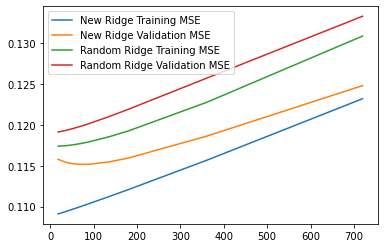

In [95]:
plt.plot(alphas, new_r_mses, label='New Ridge Training MSE')
plt.plot(alphas, test_r_mses, label='New Ridge Validation MSE')
plt.plot(alphas, rand_r_mses, label = 'Random Ridge Training MSE')
plt.plot(alphas, rand_r_test_mses, label = 'Random Ridge Validation MSE')
plt.legend()

#### Lasso Regression with Four Features, Random Sample 

In [96]:
# Lasso regression
rand_lasso = Lasso(alpha=0.05)
rand_lasso.fit(rX_train, ry_train)

Lasso(alpha=0.05)

In [97]:
# add the results from the random sample lasso regression 
# to the lasso regression with the added four features
nl_coeffs['Rand Lasso Coefs'] = list(rand_lasso.intercept_) + list(rand_lasso.coef_)
nl_coeffs

# the results are once again very similar

,1,Rand Lasso Coefs
0,,
intercept,-0.001159,-1.253028e-11
LotArea,0.04084,4.430418e-02
OverallQual,0.264567,2.980792e-01
OverallCond,0.0,0.000000e+00
YearBuilt,0.046394,5.209067e-02
YearRemodAdd,0.028091,6.447123e-02
BsmtFinSF1,0.113352,1.158752e-01
BsmtUnfSF,-0.0,-0.000000e+00
TotalBsmtSF,0.098285,1.031198e-01


In [98]:
# We now consider different lambda values. The alphas are half the lambdas
alphas=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
rand_l_mses=[]
rand_l_test_mses=[]

# use regress with lasso to append new mses to mses list     
regress(alphas, rX_train, ry_train, rX_val, ry_val, rX_test, ry_test, rand_l_mses, rand_l_test_mses, 'lasso')
    
lasso_mses_table['Random Lasso Training MSE'] = rand_l_mses
lasso_mses_table['Random Lasso Validation MSE'] = rand_l_test_mses
lasso_mses_table

,Alphas,Original Lasso Training MSE,Original Lasso Validation MSE,New Lasso Training MSE,New Lasso Validation MSE,Random Lasso Training MSE,Random Lasso Validation MSE
0,0.0050,0.116548,0.118786,0.109627,0.113757,0.116698,0.119344
1,0.0100,0.116827,0.119990,0.111468,0.113159,0.116882,0.120249
2,0.0150,0.118033,0.122372,0.113345,0.114602,0.118035,0.122383
3,0.0200,0.120128,0.125420,0.115954,0.116856,0.120128,0.125420
4,0.0250,0.123015,0.128881,0.119451,0.120036,0.123015,0.128881
5,0.0375,0.131786,0.138769,0.128482,0.128913,0.131786,0.138769
6,0.0500,0.140172,0.147205,0.136729,0.136549,0.140172,0.147205


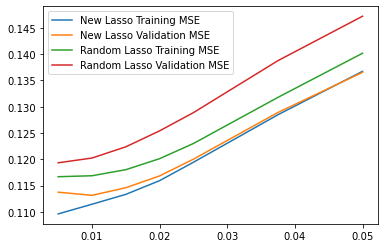

In [99]:
plt.plot(alphas, new_l_mses, label='New Lasso Training MSE')
plt.plot(alphas, new_l_test_mses, label='New Lasso Validation MSE')
plt.plot(alphas, rand_l_mses, label='Random Lasso Training MSE')
plt.plot(alphas, rand_l_test_mses, label='Random Lasso Validation MSE')
plt.legend()